<a href="https://colab.research.google.com/github/s178998/student-math-score-prediction-tf/blob/main/Math_score_prediction_model_continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes:

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


25/25 - 0s - 4ms/step - loss: 64.5973
Epoch 5/100
25/25 - 0s - 4ms/step - loss: 63.9044
Epoch 6/100
25/25 - 0s - 6ms/step - loss: 63.1453
Epoch 7/100
25/25 - 0s - 4ms/step - loss: 62.3003
Epoch 8/100
25/25 - 0s - 5ms/step - loss: 61.5369
Epoch 9/100
25/25 - 0s - 6ms/step - loss: 60.6102
Epoch 10/100
25/25 - 0s - 4ms/step - loss: 59.6716
Epoch 11/100
25/25 - 0s - 5ms/step - loss: 58.6079
Epoch 12/100
25/25 - 0s - 6ms/step - loss: 57.4529
Epoch 13/100
25/25 - 0s - 5ms/step - loss: 56.1758
Epoch 14/100
25/25 - 0s - 4ms/step - loss: 54.9103
Epoch 15/100
25/25 - 0s - 4ms/step - loss: 53.4273
Epoch 16/100
25/25 - 0s - 4ms/step - loss: 51.8201
Epoch 17/100
25/25 - 0s - 4ms/step - loss: 50.2623
Epoch 18/100
25/25 - 0s - 6ms/step - loss: 48.3642
Epoch 19/100
25/25 - 0s - 6ms/step - loss: 46.4849
Epoch 20/100
25/25 - 0s - 4ms/step - loss: 44.3378
Epoch 21/100
25/25 - 0s - 6ms/step - loss: 42.2972
Epoch 22/100
25/25 - 0s - 4ms/step - loss: 39.7819
Epoch 23/100
25/25 - 0s - 6ms/step - loss: 37.429

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Grid search Best alpha: {'alpha': 0.5}
Grid search Scorer: make_scorer(mean_squared_error, greater_is_better=False, response_method='predict')
Grid search Best score: -29.48
Ridge best alpha: 0.1
Lasso best alpha: 0.1
MSE: 43.84, MAE: 5.13, MSLE: 0.05, Poisson Deviance: 0.87
MAPE: 301414328827904.00, Pinball Loss: 2.56, R2 Score: 0.82
Ridge Coeffecients: num__writing score                                    10.895932
num__reading score                                     3.428267
cat__gender_male                                      13.053578
cat__race/ethnicity_group B                            0.352446
cat__race/ethnicity_group C                           -0.631454
cat__race/ethnicity_group D                           -0.616175
cat__race/ethnicity_group E                            4.882022
cat__parental level of education_bachelor's degree    -0.714447
cat__parental level of education_high school           0.926047
cat__parental level of educat

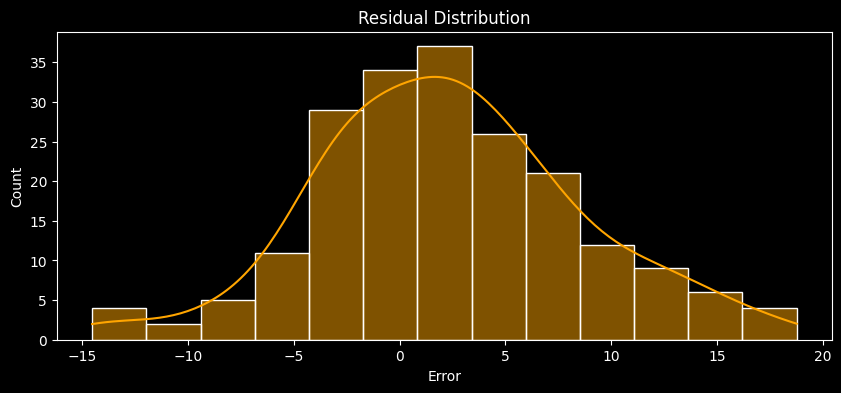

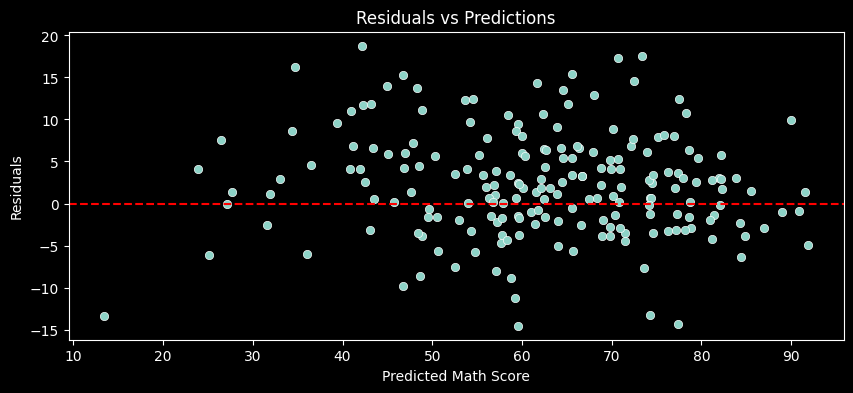

In [5]:
# Title: Predicting Mathh Score Using Linear Regression
# Author: Ayodeji Osungbohun
# Project goal: This project's goal is takes in values from the dataset to predict a future math score


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_poisson_deviance, mean_absolute_percentage_error, mean_pinball_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
# Reproducibility
np.random.seed(0)
tf.random.set_seed(0)



# Load and clean data
df = pd.read_csv('/content/sample_data/StudentsPerformance.csv') # From kaggle

print(df.dtypes)
print(df.info())

df = df.drop_duplicates()

# Features & target
x = df.drop('math score', axis=1)
y = df['math score']

df['writing_reading_score'] = df['writing score'] / df['reading score'] # Feature engineering

# Preprocessing
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_col = ['writing score', 'reading score']

preprocessed = ColumnTransformer([
    ('num', StandardScaler(), numerical_col),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

x_processed = preprocessed.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the x train and x test
x_train_processed = preprocessed.fit_transform(x_train)
x_test_processed = preprocessed.transform(x_test)

# Updated model with Dropout & BatchNorm
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_processed.shape[1],)),

    tf.keras.layers.Dense(60),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout layer added

    tf.keras.layers.Dense(40),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1)
])

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_processed, y_train)

y_pred_ridge = ridge_model.predict(x_test_processed)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_processed, y_train)

y_pred_lasso = lasso_model.predict(x_test_processed)


# fine tuning with a regularization model GridsearchCV
ridge = Ridge()

params = {'alpha': [0.2, 0.25, 0.5, 0.3]}
grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error')
grid.fit(x_train_processed, y_train)
y_pred_grid = model.predict(x_test_processed)

# Early stopping for helping prevent overtraining and it stops early if the patience number is matched
early_stopper = EarlyStopping(patience=15, restore_best_weights=True)
model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(x_train_processed, y_train, epochs=100, batch_size=32, verbose=2, callbacks=[early_stopper])

model.save("my_math_model.h5")


# Predictions
y_pred = model.predict(x_test_processed).flatten()

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mpd = mean_poisson_deviance(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpl = mean_pinball_loss(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Displaying the results for the  tuning model
print(f"Grid search Best alpha: {grid.best_params_}")
print(f"Grid search Scorer: {grid.scorer_}")
print(f'Grid search Best score: {grid.best_score_:.2f}')

#Displaying the results for the Ridge tuning model
print(f"Ridge best alpha: {ridge_model.alpha}")

print(f"Lasso best alpha: {lasso_model.alpha}")

print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, MSLE: {msle:.2f}, Poisson Deviance: {mpd:.2f}')
print(f'MAPE: {mape:.2f}, Pinball Loss: {mpl:.2f}, R2 Score: {r2:.2f}')

feature_name = preprocessed.get_feature_names_out()

if len(feature_name) > 0:
  if hasattr(ridge_model, 'coef_'):
    ridge_coeffecients = pd.Series(data=ridge_model.coef_, index=feature_name)
  elif hasattr(lasso_model, 'coef_'):
    lasso_coeffecients = pd.Series(data=ridge_model.coef_, index=feature_name)

print(f"Ridge Coeffecients: {ridge_coeffecients}")
print(f"Lasso Coeffecients: {ridge_coeffecients}")

plt.style.use('dark_background')

# Residual Plots
residuals = y_test - y_pred


plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, color='orange')

plt.title('Residual Distribution')
plt.xlabel('Error')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Math Score')
plt.ylabel('Residuals')
plt.show()





